In [269]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
import numpy as np
import os
import csv
import math

In [270]:
startingDir = 'outputDatasetTestPlots'
printFlag = True
errorsFlag = False
bobsNumberTestData = {}

In [271]:
def confInt(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return round((m-h), 2), round((m+h), 2)


def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x, y)

def printResults(data):
    print('Test ' + str(data['bobsNumber']) + ' bobs, Thr ' + str(data['thresholdNumber']) +
        ':\t StoreDLT avg=' + str(round(np.mean(data['storeDLT']), 2)) +
        'ms,confint=' + str(confInt(data['storeDLT'])) +
        'ms,\t StoreKf avg=' + str(round(np.mean(data['storeKfrags']), 2)) +
        'ms,confint=' + str(confInt(data['storeKfrags'])) +
        'ms,\t GetCf avg=' + str(round(np.mean(data['getCfrags']), 2)) +
        'ms,confint=' + str(confInt(data['getCfrags'])) +
        #',\t Std= ' + str(round(np.std(data['values']), 2)) +
        'ms,\t Err%= ' +
        str(round(
            (data['errors'] / (data['errors'] + len(data['getCfrags'])))*100, 2)))

In [272]:
path = os.walk(startingDir)
startDir = next(path)
startDir[1].sort(key=lambda x: int(x))
for bobsNumberString in startDir[1]:
    bobsNumber = int(bobsNumberString)
    bobsNumberDir = next(os.walk(startDir[0] + '/' + bobsNumberString))
    bobsNumberDir[1].sort()
    for thresholdString in bobsNumberDir[1]:
        thresholdNumber = int(thresholdString)
        thresholdTestData = {
            'singleTests': [],
            'storeDLT': [],
            'storeKfrags': [],
            'getCfrags': [],
            'errors': 0,
            'bobsNumber': bobsNumber,
            'thresholdNumber': thresholdNumber,
        } 
        thresholdNumberDir = os.walk(bobsNumberDir[0] + '/' + thresholdString)
        next(thresholdNumberDir)
        for testDirectory in thresholdNumberDir:
            singleTestData = {
                'bobs': [],
                'storeDLT': [],
                'storeKfrags': [],
                'getCfrags': [],
                'errors': 0,
                'name': testDirectory[0].split('/')[-1],
                'bobsNumber': bobsNumber,
                'thresholdNumber': thresholdNumber,
            }
            for singleBobString in testDirectory[2]:
                singleBobTestData = {
                    'storeDLT': [],
                    'storeKfrags': [],
                    'getCfrags': [],
                    'errors': 0,
                    'name': testDirectory[0].split('/')[-1],
                    'bobsNumber': bobsNumber,
                    'thresholdNumber': thresholdNumber,
                }
                with open(testDirectory[0]+'/'+singleBobString, 'r') as singleBobCSV:
                    reader = csv.reader(singleBobCSV)
                    next(reader)
                    for row in reader:
                        counter = int(row[0])
                        start = int(row[1])
                        storeDLT = int(row[2])
                        storeKfrags = int(row[3])
                        finish = int(row[4])
                        if finish == -1:
                            singleBobTestData['errors'] += 1
                            thresholdTestData[4] += 1
                        else:
                            # storeDLT
                            storeDLTRes = storeDLT - start
                            singleBobTestData['storeDLT'].append(storeDLTRes)
                            singleTestData['storeDLT'].append(storeDLTRes)
                            thresholdTestData['storeDLT'].append(storeDLTRes)
                            # storeKfrags
                            storeKfragsRes = storeKfrags - storeDLT
                            singleBobTestData['storeKfrags'].append(storeKfragsRes)
                            singleTestData['storeKfrags'].append(storeKfragsRes)
                            thresholdTestData['storeKfrags'].append(storeKfragsRes)
                            # getCfrags
                            getCfragsRes = finish - storeKfrags
                            singleBobTestData['getCfrags'].append(getCfragsRes)
                            singleTestData['getCfrags'].append(getCfragsRes)
                            thresholdTestData['getCfrags'].append(getCfragsRes)
                    singleTestData['bobs'].append(singleBobTestData)
                singleBobCSV.close()
                '''
                lenTC = len(singleBobTestData['getCfrags']) + singleBobTestData['errors']
                if lenTC != cycles:
                    print('Check: ' + testDirectory[0] +
                        ' ' + str(lenTC) + '/' + str(cycles))
                    errorsNotWritten = cycles - lenTC
                    singleBobTestData['errors'] += errorsNotWritten
                    thresholdTestData[4] += errorsNotWritten
                '''
            thresholdTestData['singleTests'].append(singleTestData)
        if printFlag:
            printResults(thresholdTestData)
        if bobsNumberString not in bobsNumberTestData:
            bobsNumberTestData[bobsNumberString] = []
        bobsNumberTestData[bobsNumberString].append(thresholdTestData)


Test 2 bobs, Thr 1:	 StoreDLT avg=4.17ms,confint=(3.13, 5.2)ms,	 StoreKf avg=7.33ms,confint=(4.04, 10.63)ms,	 GetCf avg=3.67ms,confint=(2.58, 4.75)ms,	 Err%= 0.0
Test 2 bobs, Thr 2:	 StoreDLT avg=3.17ms,confint=(2.13, 4.2)ms,	 StoreKf avg=5.67ms,confint=(3.12, 8.21)ms,	 GetCf avg=4.0ms,confint=(1.8, 6.2)ms,	 Err%= 0.0
Test 2 bobs, Thr 3:	 StoreDLT avg=3.83ms,confint=(2.03, 5.64)ms,	 StoreKf avg=6.5ms,confint=(3.33, 9.67)ms,	 GetCf avg=6.0ms,confint=(2.43, 9.57)ms,	 Err%= 0.0
Test 3 bobs, Thr 1:	 StoreDLT avg=2.89ms,confint=(2.08, 3.7)ms,	 StoreKf avg=5.44ms,confint=(4.05, 6.84)ms,	 GetCf avg=3.33ms,confint=(2.47, 4.19)ms,	 Err%= 0.0
Test 3 bobs, Thr 2:	 StoreDLT avg=4.0ms,confint=(2.51, 5.49)ms,	 StoreKf avg=5.78ms,confint=(3.9, 7.65)ms,	 GetCf avg=4.67ms,confint=(3.28, 6.05)ms,	 Err%= 0.0
Test 3 bobs, Thr 3:	 StoreDLT avg=2.44ms,confint=(1.77, 3.12)ms,	 StoreKf avg=4.22ms,confint=(3.08, 5.36)ms,	 GetCf avg=4.67ms,confint=(2.63, 6.7)ms,	 Err%= 0.0
Test 4 bobs, Thr 1:	 StoreDLT avg=4.33

In [273]:
tNum = len(bobsNumberTestData[list(bobsNumberTestData.keys())[0]])
tNum

3

In [274]:
#Prepare data for plots
# The sum of all latencies
allLatencies = [[] for x in range(tNum * len(bobsNumberTestData))]
avg = np.zeros(tNum * len(bobsNumberTestData))
errLines = np.zeros(tNum * len(bobsNumberTestData))
err = np.zeros(tNum * len(bobsNumberTestData))
# Only store DLT
sdLatencies = [[] for x in range(tNum * len(bobsNumberTestData))]
sdAvg = np.zeros(tNum * len(bobsNumberTestData))
sdErrLines = np.zeros(tNum * len(bobsNumberTestData))
sdErr = np.zeros(tNum * len(bobsNumberTestData))
sdLatenciesPerThresh = [[] for x in range(tNum)]
# Only store kfrags
skLatencies = [[] for x in range(tNum * len(bobsNumberTestData))]
skAvg = np.zeros(tNum * len(bobsNumberTestData))
skErrLines = np.zeros(tNum * len(bobsNumberTestData))
skErr = np.zeros(tNum * len(bobsNumberTestData))
skLatenciesPerThresh = [[] for x in range(tNum)]
# Only store cfrags
gcLatencies = [[] for x in range(tNum * len(bobsNumberTestData))]
gcAvg = np.zeros(tNum * len(bobsNumberTestData))
gcErrLines = np.zeros(tNum * len(bobsNumberTestData))
gcErr = np.zeros(tNum * len(bobsNumberTestData))
gcLatenciesPerThresh = [[] for x in range(tNum)]
# For labels
nmbrs = []
trslds = []
sumNum = 0
flag = False
for bobsNumber in bobsNumberTestData:
    bobsNumberXData = bobsNumberTestData[bobsNumber]
    mulNum = 0
    for thresholdXData in bobsNumberXData:
        tmpSD = np.array(thresholdXData['storeDLT'])
        tmpSK = np.array(thresholdXData['storeKfrags'])
        tmpGC = np.array(thresholdXData['getCfrags'])
        tmp = np.add(np.add(tmpSD,tmpSK),tmpGC)
        # All
        allLatencies[sumNum+mulNum] = tmp
        avg[mulNum+sumNum] = round(np.mean(tmp), 2)
        errLines[sumNum+mulNum] = avg[mulNum+sumNum] - confInt(tmp, .95)[0]
        #errLines[sumNum+mulNum] = round(np.std(tmp), 2)
        # Store DLT
        sdLatencies[sumNum+mulNum] = tmpSD
        sdAvgTmp = round(np.mean(tmpSD), 2)
        sdAvg[mulNum+sumNum] = sdAvgTmp
        sdErrLines[sumNum+mulNum] = sdAvgTmp - confInt(tmpSD, .95)[0]
        sdLatenciesPerThresh[mulNum].append(sdAvgTmp)
        # Store Kfrags
        skLatencies[sumNum+mulNum] = tmpSK
        skAvgTmp = round(np.mean(tmpSK), 2)
        skAvg[mulNum+sumNum] = skAvgTmp
        skErrLines[sumNum+mulNum] = skAvgTmp - confInt(tmpSK, .95)[0]
        skLatenciesPerThresh[mulNum].append(skAvgTmp)
        # Get Cfrags
        gcLatencies[sumNum+mulNum] = tmpGC
        gcAvgTmp = round(np.mean(tmpGC), 2)
        gcAvg[mulNum+sumNum] = gcAvgTmp
        gcErrLines[sumNum+mulNum] = gcAvgTmp - confInt(tmpGC, .95)[0]
        gcLatenciesPerThresh[mulNum].append(gcAvgTmp)
        # Errors
        err[mulNum+sumNum] = thresholdXData['errors'] / (len(thresholdXData['getCfrags']) + thresholdXData['errors'])
        mulNum += 1
        if not flag:
            trslds.append(str(thresholdXData['thresholdNumber']))
    flag = True
    nmbrs.append(bobsNumber)
    sumNum += tNum
# Create x values and labels     
startNum = .5
width = .6
distWidth = .05
positions = []
labels = []
labelsWithoutSpaces = []
for x in range(len(bobsNumberTestData)):
    a = startNum + width
    positions.append(a)
    if tNum == 1:
        labels.append(str(nmbrs[x]))
    else:
        labels.append('  ')
    for y in range(tNum - 1):
        b = a + width + distWidth
        positions.append(b)
        if y == math.floor(tNum / 2) - 1:
            labels.append(str(nmbrs[x]))
            labelsWithoutSpaces.append(str(nmbrs[x]))
        else:
            labels.append('  ')
        a = b
    startNum = a + width

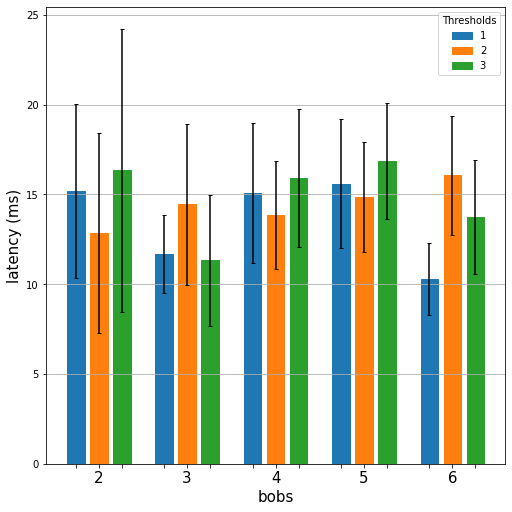

In [275]:
fig1, ax1 = plt.subplots(constrained_layout=True)
fig1.set_size_inches(7, 7)
# plt.yscale('log')
ax1.yaxis.grid(True)

bp1 = ax1.bar(positions, avg, .5, yerr=errLines,
            align='center', ecolor='black', capsize=2)

ax1.set_xticks(positions)
ax1.set_xticklabels(labels, fontsize=15)
ax1.set_ylabel("latency (ms)", fontsize=15)
ax1.set_xlabel("bobs", fontsize=15)

colors = list(mcolors.TABLEAU_COLORS) #['tab:blue', 'tab:red', 'tab:green']
patches = []
for i, bar in enumerate(bp1):
    bar.set_color(colors[i % tNum])
for i in range(tNum):    
    patches.append(mpatches.Patch(color=colors[i % tNum], label=trslds[i % tNum]))

ax1.legend(title='Thresholds', handles=patches, fontsize='medium')

plt.show()

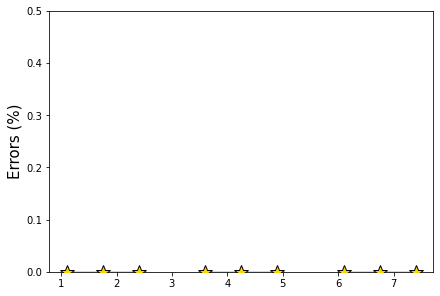

In [276]:
fig3, ax3 = plt.subplots(constrained_layout=True)
ylab2 = 'Errors (%)'
ax3.set_ylabel(ylab2, fontsize=15)
ax3.plot(positions[0:3], err[0:3], color='gold', marker='*', markeredgecolor='black', markersize=15, zorder=10)
ax3.plot(positions[3:6], err[3:6], color='gold', marker='*', markeredgecolor='black', markersize=15, zorder=10)
ax3.plot(positions[6:9], err[6:9], color='gold', marker='*', markeredgecolor='black', markersize=15, zorder=10)
ax3.set_ylim([0, 0.5])

star = mlines.Line2D([], [], color='gold', marker='*', linestyle='None', markeredgecolor='black',
                     markersize=15, label='Errors')
diamond = mlines.Line2D([], [], color='w', marker='D', linestyle='None', markeredgecolor='black',
                       markersize=10, label='Averages')
plt.show()


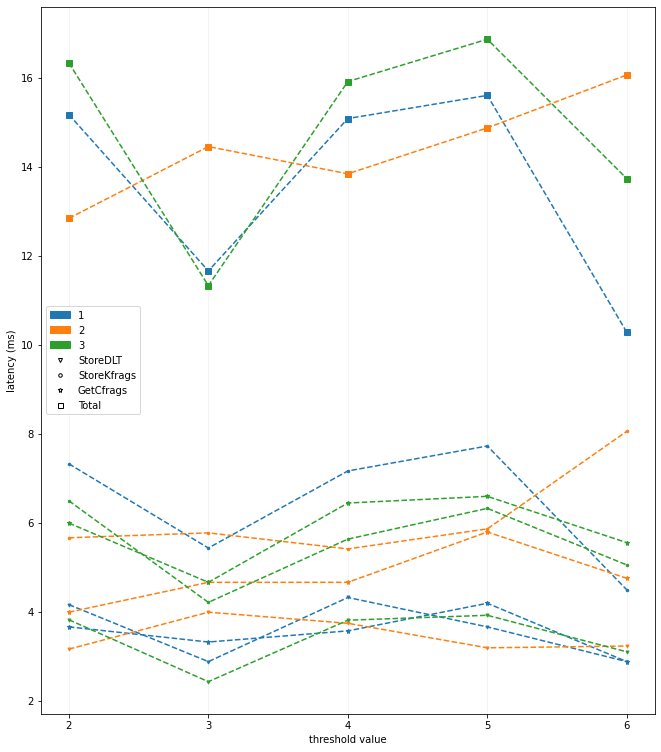

In [278]:
x_data = np.array([int(x) for x in list(bobsNumberTestData.keys())])
colors = list(mcolors.TABLEAU_COLORS) #['tab:blue', 'tab:red', 'tab:green']
for t in range(tNum):
    bobsNumberXData = bobsNumberTestData[bobsNumber]
    tot = np.add(np.add(sdLatenciesPerThresh[t],skLatenciesPerThresh[t]), gcLatenciesPerThresh[t])
    a, b = np.polyfit(x_data, tot, deg=1)
    tot_est = a * x_data + b

    #plt.plot(x_data, tot_est, '--', color='tab:brown', alpha=0.5)
    plt.plot(x_data, sdLatenciesPerThresh[t], 'v', linestyle="--", color=colors[t], label='storeDLT', markersize=3)
    plt.plot(x_data, skLatenciesPerThresh[t], '.', linestyle="--", color=colors[t],
            label='storeKfrags', markersize=5)
    plt.plot(x_data, gcLatenciesPerThresh[t], '*', linestyle="--", color=colors[t], label='getCfrags', markersize=5)
    plt.plot(x_data, tot, 's', linestyle="--", color=colors[t], label='total')

plt.xticks(x_data)
plt.ylabel('latency (ms)')
plt.xlabel('threshold value')
plt.grid(axis='x', color='0.95')

triangle = mlines.Line2D([], [], color='w', marker='v', linestyle='None', markeredgecolor='black',
                        markersize=4, label='StoreDLT')
circle = mlines.Line2D([], [], color='w', marker='.', linestyle='None', markeredgecolor='black',
                markersize=7, label='StoreKfrags')
star = mlines.Line2D([], [], color='w', marker='*', linestyle='None', markeredgecolor='black',
                markersize=5, label='GetCfrags')
square = mlines.Line2D([], [], color='w', marker='s', linestyle='None', markeredgecolor='black',
                markersize=5, label='Total')
patches = []
for i in range(tNum):    
    patches.append(mpatches.Patch(color=colors[i % tNum], label=trslds[i % tNum]))
patches.append(triangle)
patches.append(circle)
patches.append(star)
patches.append(square)
plt.legend(handles=patches)

plt.rcParams["figure.figsize"] = (11, 13)